# EDA Help

### Hello Kaggler!
### <span style="color:PURPLE">Objective of this kernal is to demonstrate most commonly used</span> <span style="color:red">EDA Techniques</span>. <span style="color:PURPLE">It is true that EDA depends on your dataset. However basics introduced here applies for all most all datasets.</span> . 

#### Other Kernels I reffered whern writing this one
* [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/notebook)
* [A Simple Tutorial on Exploratory Data Analysis](https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis)


# Table Of Contents

1. [Quick view at data -> head and tail of our data](#view)
1. [Univariate Analysis](#UnivariateAnalysis)
    1. [Analysis of a numerical feature](#AnalysisofaNumericalFeature)
    1. [Analysis of a categorical feature](#Analysisofacategoricalfeature)
1. [Bivariate Analysis](#BivariateAnalysis)
    1. [Relationship of a numerical feature with another numerical feature](#Relationshipofanumericalfeaturewithanothernumericalfeature)
    1. [Relationship of a numerical feature with a categorical feature](#Relationshipofanumericalfeaturewithcategoricalfeature)
1. [Investgation of missing values](#Null)
    1. [What's missing? to what extent?](#MissingStats)
    1. [Visualizing missing values in a dataframe](#VisualizingMissingvalues)
1. [Distribution plots for list of numerical features](#DistplotsforallNumricals)
1. [Describing categorical and numerical features separately](#DescribingCatAndNum)
1. [List unique values in categorical columns](#UniqueValues)
1. [Get to know your dataset using <span style="color:PURPLE">Pandas Profiling</span>](#PandasProfiling)
1. [This kernel is under Construction, Much more to be added here!!](#aa)


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

#Load datasets for demonstrations
titanic_data = pd.read_csv("../input/titanic/train.csv")
house_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

['house-prices-advanced-regression-techniques', 'titanic']


### Peek Data[^](#view)<a id="view" ></a><br>

Are you a "I will not believe until I see" person?. Well, weather thats true or false, everyody grasps more clearly when they see. ;)
Let's have a look at the data using pandas .head() and .tail() functions.  

In [2]:
#look at first 5 rows using .head()
house_data.head()

#Wanna see more?. try -> house_data.head(13) for first 13 rows.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
#look at last 5 rows using .tail()
house_data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

---
## Univariate Analysis [^](#UnivariateAnalysis)<a id="UnivariateAnalysis" ></a><br>

### Analysis of a numerical feature [^](#AnalysisofaNumericalFeature)<a id="AnalysisofaNumericalFeature" ></a><br>


Let's get into business!. Ever wondered how to develop an understanding on a numerical feature?. Well, there are few basic things that we can do,
1. Peek
1. Descriptive statistics summary
1. Distribution plot
1. Skewness and Kurtosis

Depending on our requirement we can decide what to use. 


I am using *'SalePrice'* column of the housing dataset for demonstation.

In [4]:
#Peek... head or tail
house_data['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

Ah interesting!. A numerical feature with big values.. mmm.

In [5]:
# Descriptive statistics summary
house_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

We got 1460 values with a mean value of approx 180921, showing a std value of 79442.5. Minimum feature value is observed as 34900 while max value is reported as 755000.

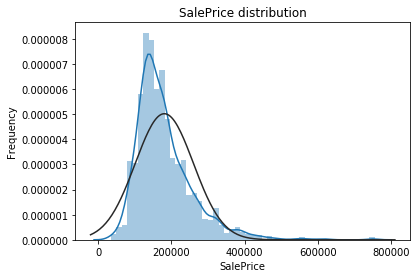

In [6]:
from scipy.stats import norm
# Distribution plot
def distribution_plot(data):
    sns.distplot(data, fit=norm)
    plt.ylabel('Frequency')
    plt.title(f'{data.name} distribution')
    
distribution_plot(house_data['SalePrice'])

In [7]:
#skewness and kurtosis
print("Skewness: %f" % house_data['SalePrice'].skew())
print("Kurtosis: %f" % house_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Analysis of a categorical feature [^](#Analysisofacategoricalfeature)<a id="Analysisofacategoricalfeature" ></a><br>
Say we have a categorical feature how are we gonna analyse it?. Mentioned below are some useful techniques.
* Describe
* Count plots
*

For the demonstration of above techniques let's use  

---
## Bivariate Analysis [^](#BivariateAnalysis)<a id="BivariateAnalysis" ></a><br>

### Relationship of a numerical feature with another numerical feature [^](#Relationshipofanumericalfeaturewithanothernumericalfeature)<a id="Relationshipofanumericalfeaturewithanothernumericalfeature" ></a><br>

Most often we feel curious on how two numerical features behave wrt each other. Following techniques helps us to develop insights on those hidden relationships.
* Scatterplot


For demonstration lets use 'GrLivArea'(groundLivingArea) and 'SalePrice' from housing dataset

" Alternatively you could use following function \ndef scatterplot(seriesX,seriesY):\n    data = pd.concat([seriesY, seriesX], axis=1)\n    data.plot.scatter(x=seriesX.name, y=seriesY.name)\n    \nscatterplot(house_data['GrLivArea'],house_data['SalePrice'])\n"

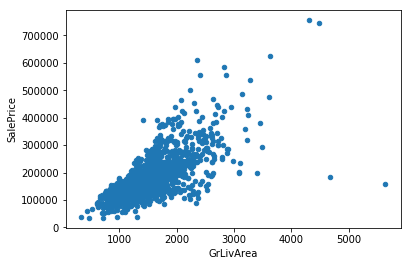

In [8]:
#scatter plot
house_data.plot.scatter(x='GrLivArea', y='SalePrice');

''' Alternatively you could use following function 
def scatterplot(seriesX,seriesY):
    data = pd.concat([seriesY, seriesX], axis=1)
    data.plot.scatter(x=seriesX.name, y=seriesY.name)
    
scatterplot(house_data['GrLivArea'],house_data['SalePrice'])
'''

 It seems that 'SalePrice' and 'GrLivArea' are good friends, with a linear relationship.

### Relationship of a numerical feature with a categorical feature [^](#Relationshipofanumericalfeaturewithcategoricalfeature)<a id="Relationshipofanumericalfeaturewithcategoricalfeature" ></a><br>

Let's try to visualize a relationship between a numerical feature and a categorical feature. Lets use Sale Price as the numerical feature and OverallQual which indicates Overall material and finish quality as the categorical feature from housing dataset. I know what you are thinking... we expect to see sale price increase with overall quality.. Lets see whether we could see that using following techniques,
* Box Plot


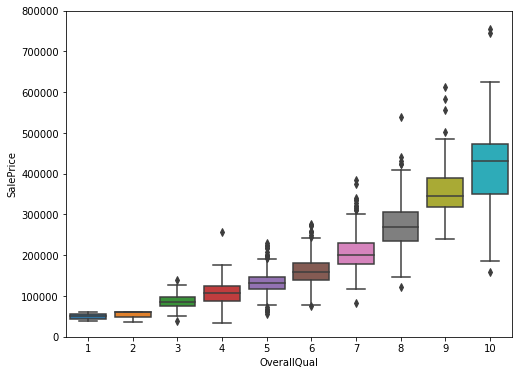

In [9]:
#Box plot
num = 'SalePrice'
cat = 'OverallQual'
df  =  house_data

data = pd.concat([df[num], df[cat]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=cat, y=num, data=data)
fig.axis(ymin=0, ymax=800000);

How beautiful! Just as we expected! Sales Price increses with OverallQual(Overall material and finish quality)

Let's do this to analyse relationship with SalePrice for few more categorical columns.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


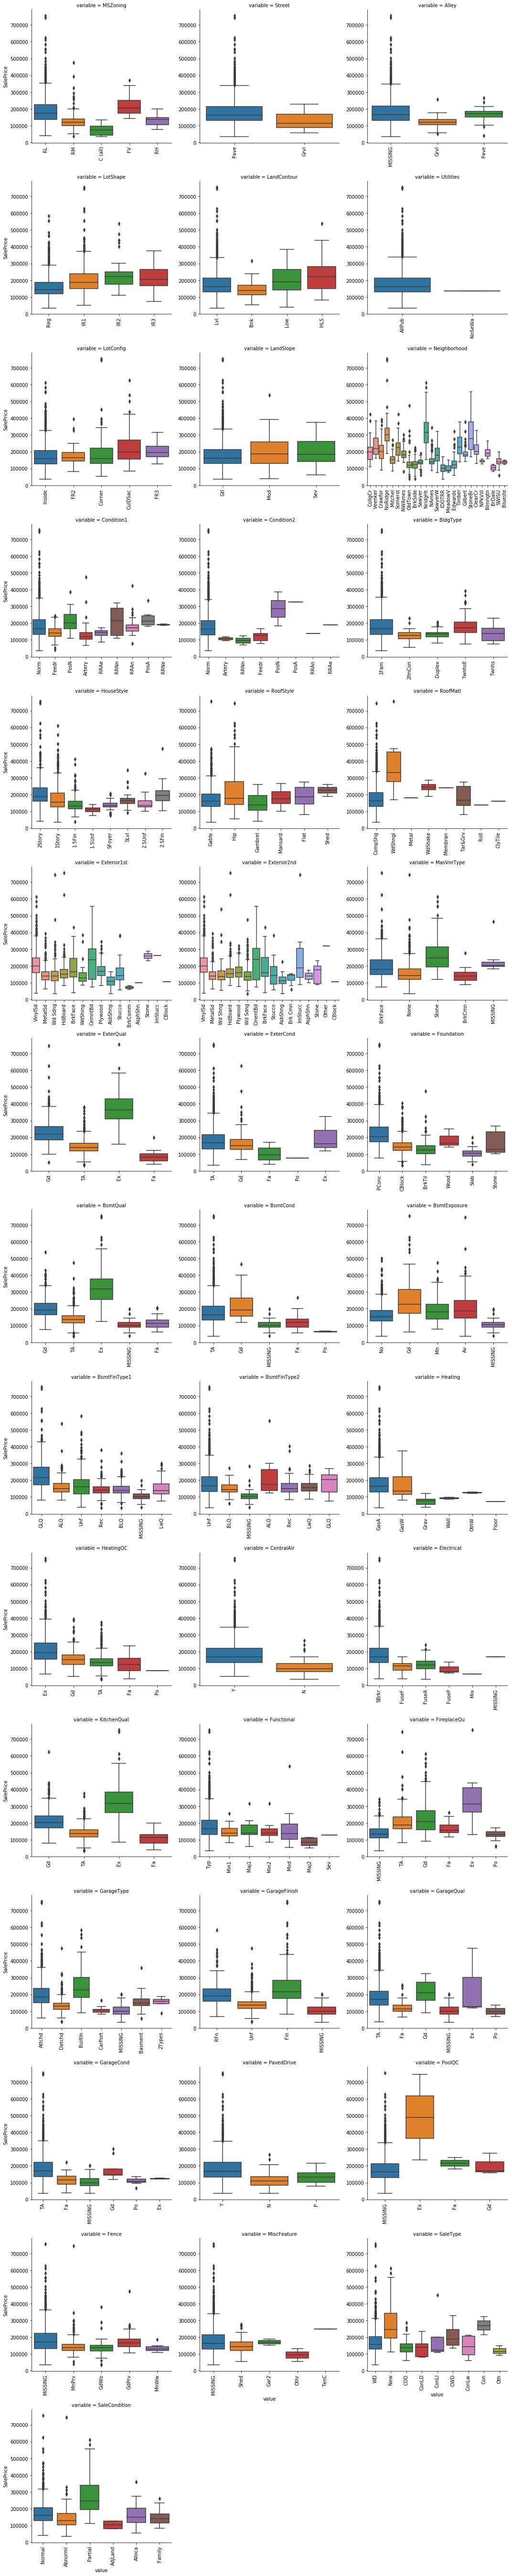

In [10]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

def fillMissingCatColumns(data,categorical):
    for c in categorical:
        data[c] = data[c].astype('category')
        if data[c].isnull().any():
            data[c] = data[c].cat.add_categories(['MISSING'])
            data[c] = data[c].fillna('MISSING')
    
def getboxPlots(data,var,categorical):
    fillMissingCatColumns(data,categorical)
    f = pd.melt(data, id_vars=var, value_vars=categorical)
    g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
    g = g.map(boxplot, "value", var)
    

data = house_data.copy()
categorical = [f for f in data.columns if data.dtypes[f] == 'object']    
getboxPlots(data,'SalePrice',categorical)

---
## Investgation of missing values[^](#Null)<a id="Null" ></a><br>

### What's missing? to what extent?[^](#MissingStats)<a id="MissingStats" ></a><br>

In [11]:
def getMissingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
    temp = pd.concat([total, percent], axis = 1,keys= ['Total Missing Count', '% of Total Observations'])
    temp.index.name ='Feature Name'
    return temp.loc[(temp['Total Missing Count'] > 0)]

getMissingValuesInfo(house_data)

Total Missing Count  % of Total Observations
Feature Name                                              
PoolQC                       1453                    99.52
MiscFeature                  1406                    96.30
Alley                        1369                    93.77
Fence                        1179                    80.75
FireplaceQu                   690                    47.26
LotFrontage                   259                    17.74
GarageCond                     81                     5.55
GarageType                     81                     5.55
GarageYrBlt                    81                     5.55
GarageFinish                   81                     5.55
GarageQual                     81                     5.55
BsmtExposure                   38                     2.60
BsmtFinType2                   38                     2.60
BsmtFinType1                   37                     2.53
BsmtCond                       37                     2.53
BsmtQual                       37                     2.53
MasVnrArea                      8                     0.55
MasVnrType                      8                     0.55
Electrical                      1                     0.07

### Visualizing missing values in a dataframe[^](#VisualizingMissingvalues)<a id="VisualizingMissingvalues" ></a><br>

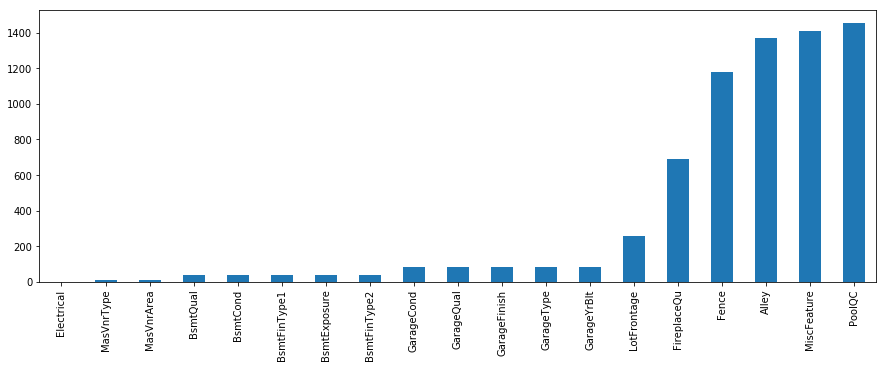

In [12]:
# Visualizing missing counts
missing = house_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.subplots(figsize=(15,5))
missing.plot.bar()
plt.show()

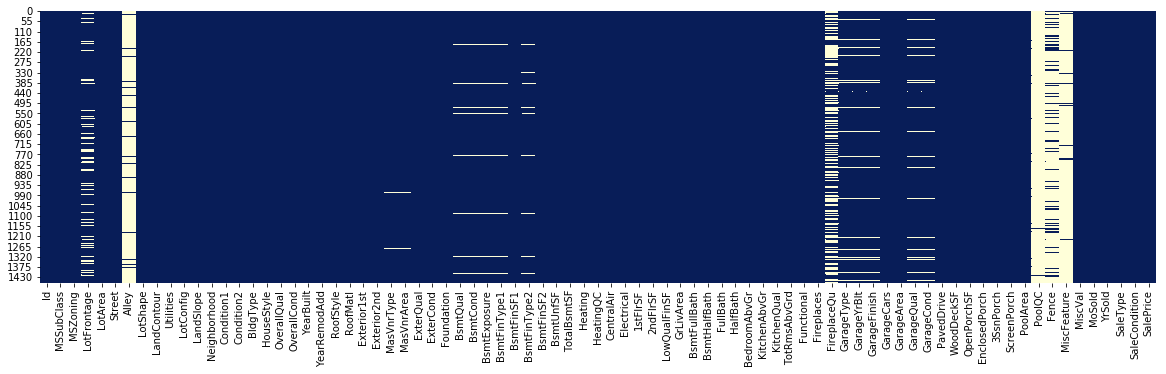

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(house_data.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

White spaces shows the missing value in the data frame.

---
### Distribution plots for list of numerical features[^](#DistplotsforallNumricals)<a id="DistplotsforallNumricals" ></a><br>

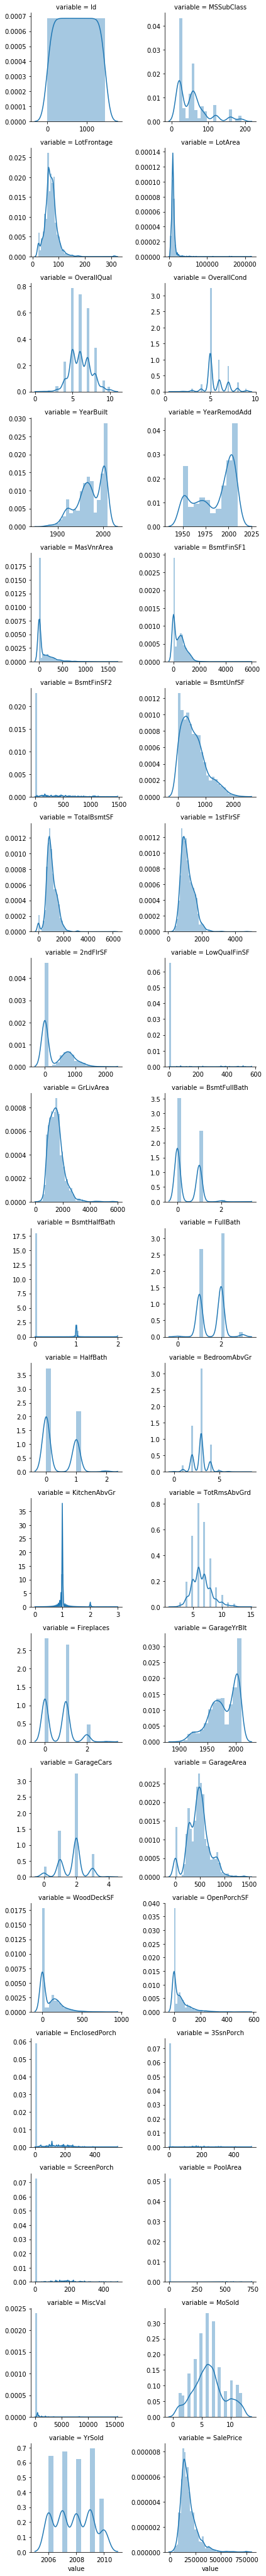

In [14]:
def distplots(data,num_features):
    f = pd.melt(data, value_vars=num_features)
    g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
    g = g.map(sns.distplot, "value")
    

num_features = house_data.select_dtypes(include=['int64','float64'])
distplots(house_data,num_features)

---
### Describing Categorical and Numerical features separately[^](#DescribingCatAndNum)<a id="DescribingCatAndNum" ></a><br>

In [15]:
num_features = house_data.select_dtypes(include=['int64','float64'])
num_features.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [16]:
categorical_features = house_data.select_dtypes(include='object')
categorical_features.describe()

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

---
### Listing unique values in categorical columns[^](#UniqueValues)<a id="UniqueValues" ></a><br>


In [17]:
def printUniqueValues(df,cardinality=1000):
    n = df.select_dtypes(include=object)
    for column in n.columns:
        uCount = df[column].nunique()
        if uCount<=cardinality:
            print('{:>12}: {} {}'.format(column,uCount, df[column].unique()))
            #print(column,': [',uCount , '] ', df[column].unique())


printUniqueValues(house_data,10)

    MSZoning: 5 ['RL' 'RM' 'C (all)' 'FV' 'RH']
      Street: 2 ['Pave' 'Grvl']
       Alley: 2 [nan 'Grvl' 'Pave']
    LotShape: 4 ['Reg' 'IR1' 'IR2' 'IR3']
 LandContour: 4 ['Lvl' 'Bnk' 'Low' 'HLS']
   Utilities: 2 ['AllPub' 'NoSeWa']
   LotConfig: 5 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
   LandSlope: 3 ['Gtl' 'Mod' 'Sev']
  Condition1: 9 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
  Condition2: 8 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
    BldgType: 5 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
  HouseStyle: 8 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
   RoofStyle: 6 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
    RoofMatl: 8 ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
  MasVnrType: 4 ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
   ExterQual: 4 ['Gd' 'TA' 'Ex' 'Fa']
   ExterCond: 5 ['TA' 'Gd' 'Fa' 'Po' 'Ex']
  Foundation: 6 ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone'

---
### Get to know your dataset using <span style="color:PURPLE">Pandas Profiling</span>[^](#PandasProfiling)<a id="PandasProfiling" ></a><br>

Thanks to Firath's kernel : https://www.kaggle.com/frtgnn/thorough-eda-with-a-single-line-pandas-profiling/

Pandas Profiling generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

In [18]:
import pandas_profiling
profile_report = pandas_profiling.ProfileReport(titanic_data)
#profile_report.to_file("profile_report.html")
profile_report

In [19]:
# We can use pandas profiling on selected features too.

# Using Pandas Profiling to analyse SalePrice feature in housing dataset.
import pandas_profiling
series = house_data['SalePrice']
d = { series.name : series}
df = pd.DataFrame(d) 
pandas_profiling.ProfileReport(df)